# Import Libraries and Verify Dataset Directory


In [6]:
import os

# Correct directory path
directory_path = '/Users/mustafa/Desktop/nyc-taxi-trip-duration/'

# List all files in the directory
print(os.listdir(directory_path))


['.DS_Store', 'test.csv', 'train.csv', 'sample_submission.csv']


# Load Training and Test Data


In [7]:
import pandas as pd

# Set the path to the directory
directory_path = '/Users/mustafa/Desktop/nyc-taxi-trip-duration/'

# Load the training data
train_data = pd.read_csv(directory_path + 'train.csv')

# Load the test data
test_data = pd.read_csv(directory_path + 'test.csv')



### Display Initial Data Overview


In [8]:
# Display the first few rows of the training data
print(train_data.head())

# Summary statistics for the training data
print(train_data.describe())


          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731

### Data Cleaning and Column Selection


In [9]:
# Select a subset of columns
columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'trip_duration']
train_data = train_data[columns].dropna()  # Dropping rows with missing values

# We'll do the same for the test data (excluding trip_duration)
test_columns = [col for col in columns if col != 'trip_duration']
test_data = test_data[test_columns].dropna()


### Prepare Features and Target Variable


In [10]:
X_train = train_data.drop('trip_duration', axis=1)
y_train = train_data['trip_duration']


### Initialize and Train the Linear Regression Model


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### Evaluate Model Performance on Validation Set


In [12]:
from sklearn.metrics import mean_squared_error

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 10545027.872771544


### Generate and Display Predictions for Test Data


In [13]:
# Predictions
test_predictions = model.predict(test_data)

# Display the first few predictions
print(test_predictions[:5])


[ 977.78443939 1380.65089069  975.39148666  951.95205775  890.48240198]


### Establish Baseline Model Using Mean Trip Duration


In [14]:
# Calculate the mean trip duration from the training data
mean_duration = y_train.mean()

# Create a baseline prediction array with the mean duration for all instances in the validation set
baseline_predictions = [mean_duration] * len(y_val)


### Calculate and Display MSE for Baseline Model


In [15]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error for the baseline model
baseline_mse = mean_squared_error(y_val, baseline_predictions)
print(f'Baseline Model MSE: {baseline_mse}')


Baseline Model MSE: 10591842.82542308


### Display MSE for Linear Regression Model


In [16]:
# Assuming the Linear Regression model's predictions are stored in y_pred
model_mse = mean_squared_error(y_val, y_pred)
print(f'Linear Regression Model MSE: {model_mse}')


Linear Regression Model MSE: 10545027.872771544


### Compare MSE of Baseline and Linear Regression Models


In [17]:
print(f'Baseline Model MSE: {baseline_mse}')
print(f'Linear Regression Model MSE: {model_mse}')


Baseline Model MSE: 10591842.82542308
Linear Regression Model MSE: 10545027.872771544


### Display Statistical Summary of Trip Durations


In [22]:
print(train_data['trip_duration'].describe())


count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64


### Filter Outliers and Visualize Trip Duration Distribution


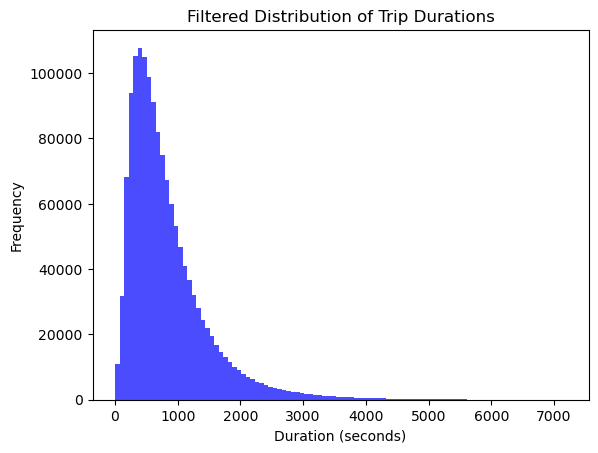

In [23]:
# Filtering out extreme outliers
filtered_data = train_data[train_data['trip_duration'] <= 7200]

# Plotting the filtered data
plt.hist(filtered_data['trip_duration'], bins=100, color='blue', alpha=0.7)
plt.title('Filtered Distribution of Trip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


### Visualize Log-Transformed Distribution of Trip Durations


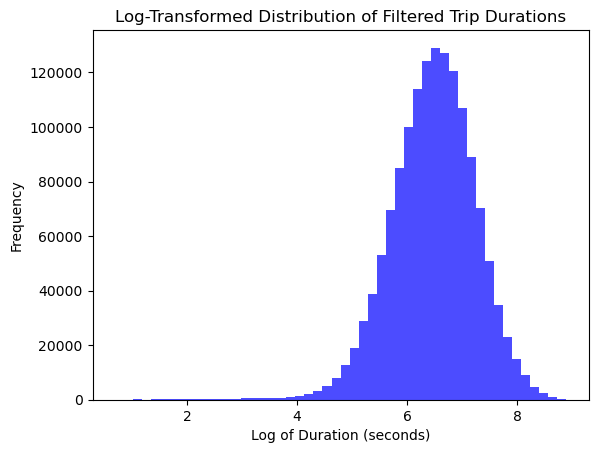

In [25]:
import numpy as np  


log_durations = np.log1p(filtered_data['trip_duration'])


import matplotlib.pyplot as plt  

plt.hist(log_durations, bins=50, color='blue', alpha=0.7)
plt.title('Log-Transformed Distribution of Filtered Trip Durations')
plt.xlabel('Log of Duration (seconds)')
plt.ylabel('Frequency')
plt.show()
